<!--HEADER-->
*Aprendizado Científico de Máquina: notas sobre aprendizado de máquina e equações diferenciais universais, em um contexto de computação científica. [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/NNDiffEqSciML/blob/main/notebooks/02.01-Redes_de_perceptrons.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a>&nbsp;

<!--NAVIGATOR-->
[<- 2. Introdução a redes neurais](02.00-Introducao_redes_neurais.ipynb) | [Redes Neurais, Equações Diferenciais e Aprendizado Científico de Máquina](00.00-Frente.ipynb) | [2.2. Funções de ativação e outros neurônios ->](02.02-Funcoes_ativacao_outros_neuronios.ipynb)

---


# Redes de perceptrons e circuitos lógicos

- Redes neurais são construídas a partir de partes elementares chamadas de *neurônios*, onde o primeiro deles a ser desenvolvido é conhecido como *perceptron*.

- Nesta seção, vamos ver esses conceitos essenciais e examinar a propriedade fundamental de que as redes de perceptrons são universais, no sentido de poderem gerar qualquer circuito lógico.

In [2]:
import os
import networkx as nx
import random
import matplotlib.pyplot as plt

## Perceptrons

### Histórico

- **Perceptrons** foram desenvolvidos nos anos 1950 e 1960 por [Frank Rosemblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), um psicólogo, cientista em psicologia e chefe da seção de sistemas de cognição da [Cornell Aeronautical Laboratory](https://en.wikipedia.org/wiki/Calspan).

- Esse desenvolvimento foi inspirado por trabalhos anteriores de Warren McCulloch e Walter Pitts.

- O objetivo, inspirado em princípios biológicos, era construir circuitos eletrônicos que tivessem a habilidade de aprender.

### Definição

- Um **perceptron** recebe entradas *(inputs)* $x_1, \ldots, x_n$ e, dependendo de **parâmetros de peso** *(weight)* e de **limiar** *(threshold)* $r$, entrega uma saída *(output)* binária, $0$ ou $1$.

- Mais explicitamente,

$$ 
  \text{saída} = 
    \begin{cases}
      0, & \displaystyle \text{se } \sum_j w_j x_j \leq r, \\
      1, & \displaystyle \text{se } \sum_j w_j x_j > r.
    \end{cases}
$$

- Atualmente, é utilizado um **bias** $b=-r$ no lugar do limiar e a saída $P=P_{\mathbf{x}, b}(\mathbf{x})$ é escrita na forma

$$ 
  P_{\mathbf{w},b}(\mathbf{x}) = 
    \begin{cases}
      0, & \displaystyle \text{se } \mathbf{w}\cdot\mathbf{x} + b \leq 0, \\
      1, & \displaystyle \text{se } \mathbf{w}\cdot\mathbf{x} + b > 0,
    \end{cases}
$$

onde $\mathbf{w}=(w_1, \ldots, w_n)$, $\mathbf{x}=(x_1, \ldots, x_n)$ e $\mathbf{w}\cdot\mathbf{x} = \sum_j w_jx_j$ é o produto escalar euclidiano em $\mathbb{R}^n$:

### Perceptron visto com função de ativação Heaviside

- Um perceptron $P_{\mathbf{w},b}$ pode ser reescrito como uma composição de uma função afim com uma Heaviside:
$$ 
  P_{\mathbf{w},b}(\mathbf{x}) = H(\mathbf{w}\cdot\mathbf{x} + b)
$$

- A função $H(s) = 0$, se $s \leq 0$, $H(s) = 1$, se $s > 0$, é uma forma da função **Heaviside**.

- Em Teoria da Medida e como distribuição, não faz sentido (ou não faz diferença) definir $H(0)$, pois $s=0$ é um conjunto de medida nula. No entanto, em várias situações, é natural escolhermos uma definição para $H(0)$:

    - $H(0)=1$, tornando $H$ contínua à direita;
    - $H(0)=0$, tornando $H$ contínua à esquerda;
    - $H(0)=1/2$, fazendo com que a série de Fourier convirja pontualmente em $s=0$ também;
    - $H(0) = [0,1]$, como função com valores em conjuntos, fazendo com que $H$ seja a subdiferencial da função parte positiva, também conhecida como ReLU -- Rectified Linear Unit -- em redes neurais, dada por $\text{ReLU}(s) = s^+ = \max\{0,s\}$

- Veremos em outro momento, que, neste caso, $H$ pode ser visto como uma função de ativação, e que um perceptron é um neurônio com função de ativação Heaviside, ou seja, um **neurônio Heaviside**.

## Circuitos NAND

- Uma característica fundamental dos perceptrons é que eles podem ser combinados para formar todos os outros circuitos lógicos OR, AND, NOT, NAND, NOR, XOR, XNOR e ainda os circuitos de controle de fluxo MUX e DEMUX, além de soma e multiplicação binária, etc.

- Isso segue simplesmente deles formarem uma porta NAND *(Not an AND)*, que é universal. Com o NAND, podemos formar todos os outros circuitos [Wikipedia NAND Logic](https://en.wikipedia.org/wiki/NAND_logic).

- Como o nome diz, um circuido **NAND** retorna **falso** (ou 0) se as suas duas entradas forem **verdadeiras** e retorna **verdadeiro** (ou 1) para qualquer outra combinação das suas duas entradas.

- Um circuito NAND pode ser expresso por uma função de dois dígitos binários em um dígito binário:

$$ (0,0)\mapsto 1, \quad (1,0)\mapsto 1, \quad (0,1)\mapsto 1, \quad (1,1)\mapsto 0.
$$

### Perceptron funcionado como NAND

- Um perceptron com $n=2$, $w_1=w_2=-2$ e $b=3$ nos dá essa mesma função:

$$ 
  \begin{align*}
    & (0,0): & &  (-2)0 + (-2)0 + 3 = 3 > 0 & \Rightarrow P = 1; \\
    & (1,0): & & (-2)1 + (-2)0 + 3 = -2 + 3 = 1 > 0 & \Rightarrow P = 1; \\
    & (0,1): & & (-2)0 + (-2)1 + 3 = -2 + 3 = 1 > 0 & \Rightarrow P = 1; \\
    & (1,1): & & (-2)1 + (-2)1 + 3 = -4 + 3 = -1 \leq 0 & \Rightarrow P = 0.
  \end{align*}
$$

### Circuitos NOR

- Da mesma forma, NOR *(Not OR)* também é universal [Wikipedia NOR Logic](https://en.wikipedia.org/wiki/NOR_logic).

- O computador de bordo do programa Apollo [Apollo Guidance Computer](https://en.wikipedia.org/wiki/Apollo_Guidance_Computer) era formado inteiramente por portas NOR. A versão *Block I* usava 4100 circuitos integrados, cada um contendo uma única porta NOR de três entradas, enquanto que a versão *Block II*, usada nos vôos tripulados, era formada por 2800 circuitos integrados, cada um com duas portas NOR de três entradas.

- Um NOR de três entradas entrega uma saída 1 se nenhuma das três entradas for 1 e entrega 0 em qualquer outro caso, ou seja

$$ 
\begin{align*}
  (0,0,0)\mapsto 1 \\
  (1,0,0)\mapsto 0 \\
  (0,1,0)\mapsto 0 \\
  (0,0,1)\mapsto 0 \\
  (1,1,0)\mapsto 0 \\
  (1,0,1)\mapsto 0 \\
  (0,1,1)\mapsto 0 \\
  (1,1,1)\mapsto 0
\end{align*}
$$

### Implementado portas lógicas com resistores e transistores

- As portas lógicas podem ser facilmente implementadas através de resistores e transistores como ilustrado em [Transistor Gates](http://230nsc1.phy-astr.gsu.edu/hbase/Electronic/trangate.html).

### Exercícios

1. Construa um perceptron que faça a função do circuito lógico AND.

1. Construa um perceptron que faça a função do circuito lógico OR.

1. Construa um perceptron que faça a função do circuito lógico NOT.

1. Mostre que não é possível construir um perceptron que faça a função do circuito lógico XOR (para um XOR, é preciso montar um rede de perceptrons).

## Redes de perceptrons

- Perceptrons podem ser combinados em um **rede**, de forma que cada perceptron receba dados das entradas originais ou de outros perceptrons e forneça dados para a saída final ou para outros perceptrons.

- Há vários tipos de **topologias** de rede possíveis, mas a mais simples é do tipo **pró-alimentada** *(feed-forwarding neural network)*.

- Na rede pró-alimentada, há várias camadas, onde cada camada só recebe dados da camada anterior ou dos dados fornecidos, caso seja a primeira camada, e só fornece dados para a camada seguinte ou para os dados de saída, caso seja a última camada.

- Podemos representar isso da seguinte forma:

$$ \text{Dados de entrada} \longmapsto \text{Camada 1} \longmapsto \ldots \longmapsto \text{Camada n} \longmapsto \text{Dados de saída}.
$$

- Cada camada da rede de perceptrons é formada por um ou mais perceptrons.

Vejamos a ilustração de uma rede pró-alimentada:

In [3]:
DG = nx.DiGraph()
random.seed(243)

n = 5
m_min = 3
m_max = 6
m_0 = 2
m_n = 2
m_i = list()
pos = dict()
for i in range(n+1):
    if i == 0:
        m_i += [m_0]
    elif i == n:
        m_i += [m_n]
    else:
        m_i += [random.randint(m_min,m_max)]
    for j in range(m_i[-1]):
        DG.add_node((i,j))
        if i > 0:
            for k in range(m_i[-2]):
                DG.add_edge((i-1, k), (i, j))
        pos.update( { (i, j): (i, j - m_i[-1]/2) } )
  

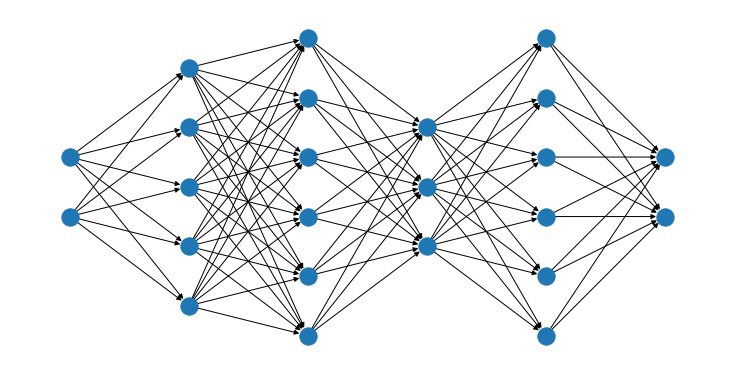

In [6]:
plt.figure(figsize=(10,5))
nx.draw(DG, pos)
plt.savefig(os.path.join('figuras', 'rede_pro_alimentada.png'))
plt.show()

## Universalidade dos circuitos NAND

- Vamos usar o exemplo em [Neural Networks and Deep Learning, Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) para ilustrar a universalidade do circuito  lógico NAND.

- Naturalmente podemos combinar vários NANDs para formar OR, AND e NOT (veja exercício abaixo). Vamos fazer outro exemplo.

- O exemplo consiste em somar dois dígitos binários $x_1$ e $x_2$ e obter dois dígitos binários $y_1$ e $y_2$ onde $y_1y_2$ é a representação binária de $x_1+x_2$, i.e.

$$ 0 + 0 = 00, \qquad 0 + 1 = 01, \qquad 1 + 0 = 01, \qquad 1 + 1= 10.
$$

### If-then-else e circuitos MUX

- O controle de fluxo *if-then-else* também pode ser construído a partir das portas lógicas fundamentais.

- Um tal controle de fluxo é um exemplo de um MUX de 2 portas e um controle.

- MUX significa *multiplexador* e entrega saídas diversas de acordo com entradas e controles.

- Um MUX com entradas A e B e controle S nos dá A ou B dependendo do valor de S e funciona como uma cláusula *if-then-else*, como em
```
if S then
    A
else
    B
end
```

- Esse MUX pode ser escrito em álgebra Booleana como (A AND S) OR (B AND NOT S).
 
- E a sua tabela-verdade é

| Entrada A | Entrada B | Controle S | Saída|
| --- | --- | --- | --- |
| 0 | 0 ou 1 | 1 | 0 |
| 1 | 0 ou 1 | 1 | 1 |
| 0 ou 1 | 0 | 0 | 0 |
| 0 ou 1 | 1 | 0 | 1 |

### Exercícios

1. Monte redes de circuitos NAND para obter os circuitos OR, AND e NOT.

1. Monte redes de circuitos NAND para obter a operação de multiplicação de duplas de bits (uma rede que recebe dois pares de dois bits, cada par representado um inteiro entre 0 e 3, e retorne  quatro bits, para um inteiro entre 0 e 9.

1. Monte uma rede de perceptrons de uma única camada implementando a multiplicação acima, de preferência com o menor número de perceptrons possível.

## Operações aritméticas

Com as portas lógicas, é possível, também, fazer as operações aritméticas básicas.

### Adição

<!--NAVIGATOR-->

---
[<- 2. Introdução a redes neurais](02.00-Introducao_redes_neurais.ipynb) | [Redes Neurais, Equações Diferenciais e Aprendizado Científico de Máquina](00.00-Frente.ipynb) | [2.2. Funções de ativação e outros neurônios ->](02.02-Funcoes_ativacao_outros_neuronios.ipynb)